# Introduction

This report aims to explore the trends in electric vehicle (EV) adoption in Australia from 2010 to 2023. We will analyze data from the International Energy Agency (IEA) and visualize the findings using Python libraries such as NumPy, Pandas, and Matplotlib.

There are three main types of electric vehicles in Australia:
* BEV: Battery Electric Vehicles
* PHEV: Plug-in Hybrid Electric Vehicles
* FCEV: Fuel Cell Electric Vehicles

# Preprocessing

First, we need to load the data and filter it for Australia. In addition, we need to check the data structure and see if any missing values.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('IEA_Global_EV_Data_2024.csv')

# Filter data for Australia
aus_data = data[data['region'] == 'Australia']

# Set up the plotting style
plt.style.use("seaborn-v0_8")

# Check the structure / data type / missing values of the dataset
aus_data.info()
aus_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 93
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      94 non-null     object 
 1   category    94 non-null     object 
 2   parameter   94 non-null     object 
 3   mode        94 non-null     object 
 4   powertrain  94 non-null     object 
 5   year        94 non-null     int64  
 6   unit        94 non-null     object 
 7   value       94 non-null     float64
dtypes: float64(1), int64(1), object(6)
memory usage: 6.6+ KB


region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

# EV Sales Trends

/var/folders/th/m610fsyx7_5fsmv51rl9twth0000gn/T/ipykernel_34873/2902966590.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Accent')(np.linspace(0, 1, len(ev_sales['powertrain'].unique())))


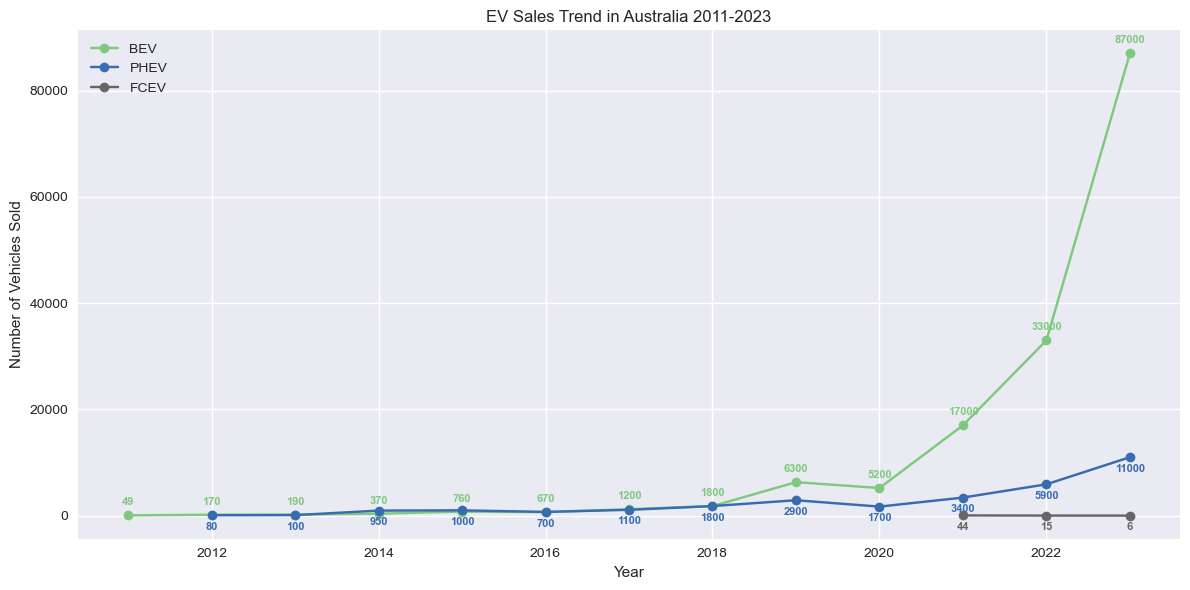

In [3]:
ev_sales = aus_data[(aus_data['parameter'] == 'EV sales') & (aus_data['unit'] == 'Vehicles')]

plt.figure(figsize=(12, 6))    
colors = plt.cm.get_cmap('Accent')(np.linspace(0, 1, len(ev_sales['powertrain'].unique())))

for i, powertrain in enumerate(ev_sales['powertrain'].unique()):
    sales_data = ev_sales[ev_sales['powertrain'] == powertrain]
    plt.plot(sales_data['year'], sales_data['value'], marker='o', label=powertrain, color=colors[i])
    va = 'top' if i == 0 else 'bottom'
    xytext = (0, 13) if i == 0 else (0, -12)
    
    for x, y in zip(sales_data['year'], sales_data['value']):
        plt.annotate(f'{int(y)}', (x, y), textcoords="offset points", xytext=xytext, ha='center', va=va,
                     fontsize=8, color=colors[i], fontweight='bold')

plt.title('EV Sales Trend in Australia 2011-2023')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Sold')
plt.legend()
plt.tight_layout()
plt.show()

# EV Stock Trend


/var/folders/th/m610fsyx7_5fsmv51rl9twth0000gn/T/ipykernel_34873/1503727612.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Accent')(np.linspace(0, 1, len(ev_stock['powertrain'].unique())))


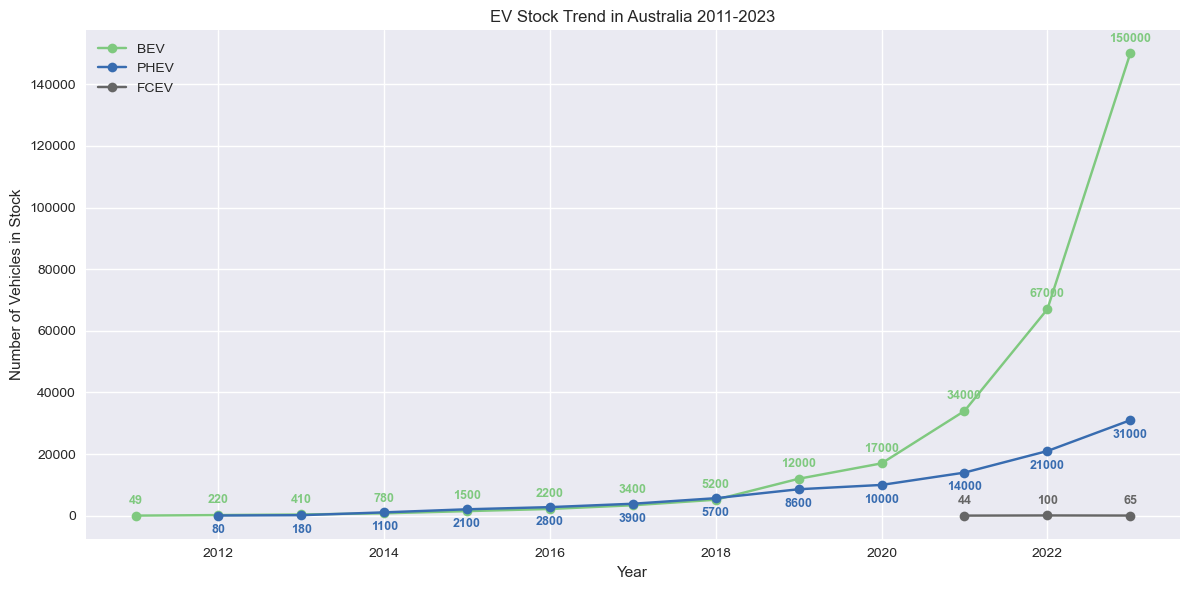

In [4]:
ev_stock = aus_data[(aus_data['parameter'] == 'EV stock') & (aus_data['unit'] == 'Vehicles')]

plt.figure(figsize=(12, 6))
colors = plt.cm.get_cmap('Accent')(np.linspace(0, 1, len(ev_stock['powertrain'].unique())))

for i, powertrain in enumerate(ev_stock['powertrain'].unique()):
    stock_data = ev_stock[ev_stock['powertrain'] == powertrain]
    plt.plot(stock_data['year'], stock_data['value'], marker='o', label=powertrain, color=colors[i])
    va = 'top' if i % 2 == 0 else 'bottom'
    xytext = (0, 15) if i % 2 == 0 else (0, -15)
    
    for x, y in zip(stock_data['year'], stock_data['value']):
        plt.annotate(f'{int(y)}', (x, y), textcoords="offset points", xytext=xytext, ha='center', va=va,
                     fontsize=9, color=colors[i], fontweight='bold')

plt.title('EV Stock Trend in Australia 2011-2023')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles in Stock')
plt.legend()
plt.tight_layout()
plt.show()

# EV Market Share Compare with Non-EV


/var/folders/th/m610fsyx7_5fsmv51rl9twth0000gn/T/ipykernel_34873/1140195355.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Accent')(np.linspace(0, 1, len(ev_share['parameter'].unique())))


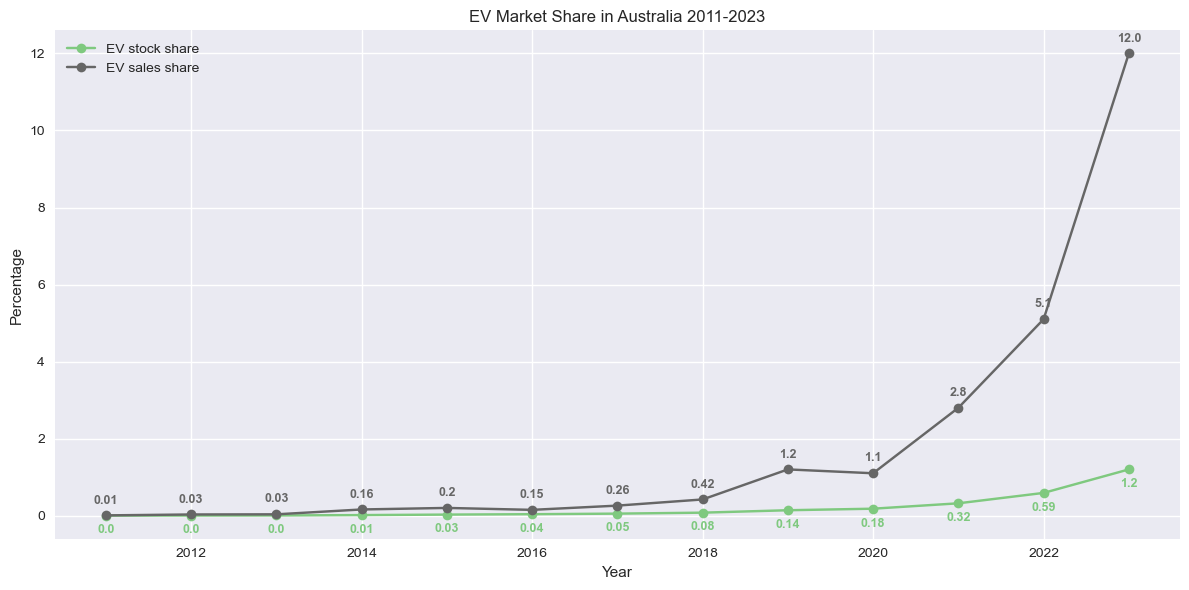

In [5]:
ev_share = aus_data[(aus_data['parameter'].isin(['EV sales share', 'EV stock share'])) & (aus_data['unit'] == 'percent')]

plt.figure(figsize=(12, 6))    
colors = plt.cm.get_cmap('Accent')(np.linspace(0, 1, len(ev_share['parameter'].unique())))

for i, parameter in enumerate(ev_share['parameter'].unique()):
    share_data = ev_share[ev_share['parameter'] == parameter]
    plt.plot(share_data['year'], share_data['value'], marker='o', label=parameter, color=colors[i])
    va = 'bottom' if i % 2 == 0 else 'top'
    xytext = (0, -15) if i % 2 == 0 else (0, 15)
    
    for x, y in zip(share_data['year'], share_data['value']):
        plt.annotate(f'{round(float(y), 2)}', (x, y), textcoords="offset points", xytext=xytext, ha='center', va=va,
                     fontsize=9, color=colors[i], fontweight='bold')

plt.title('EV Market Share in Australia 2011-2023')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.tight_layout()
plt.show()

# Charging Infrastructure


The next visualization shows the trend of EV charging infrastructure in Australia from 2011 to 2023.

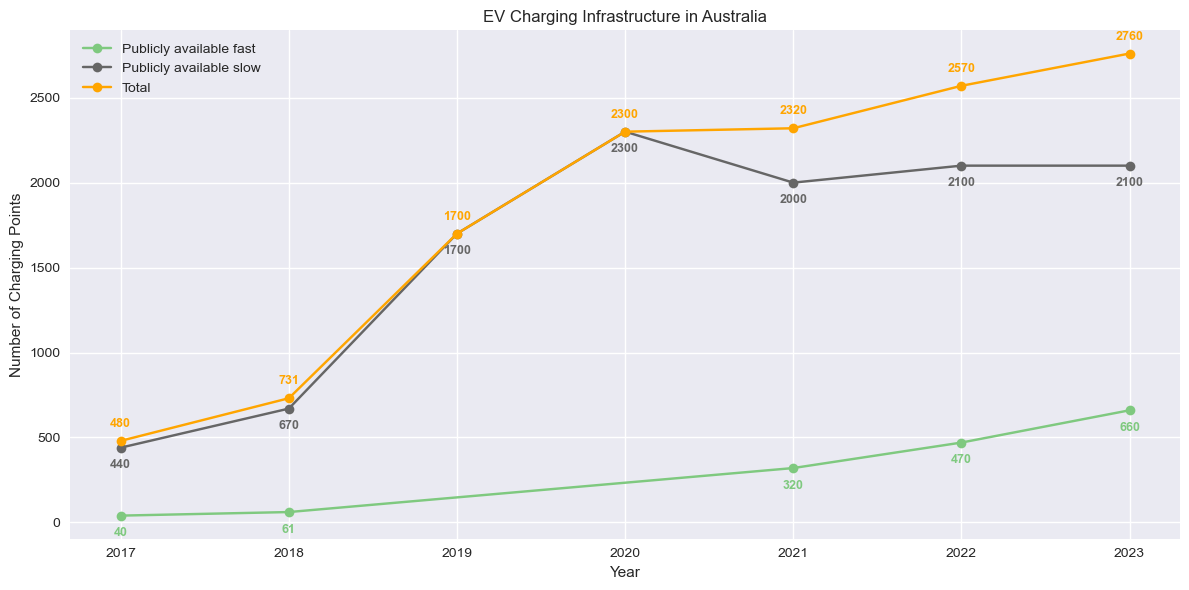

In [5]:
charging_points = aus_data[aus_data['parameter'] == 'EV charging points']

plt.figure(figsize=(12, 6))
for i, powertrain in enumerate(charging_points['powertrain'].unique()):
    powertrain_data = charging_points[charging_points['powertrain'] == powertrain]
    plt.plot(powertrain_data['year'], powertrain_data['value'], marker='o', label=powertrain, color=colors[i])
    
    for x, y in zip(powertrain_data['year'], powertrain_data['value']):
        plt.annotate(f'{int(y)}', (x, y), textcoords="offset points", xytext=(0,-15), ha='center',
                     fontsize=9, color=colors[i], fontweight='bold')

total_charging_points = charging_points.groupby('year')['value'].sum()
plt.plot(total_charging_points.index, total_charging_points.values, marker='o', label='Total', color='orange')

for x, y in zip(total_charging_points.index, total_charging_points.values):
    plt.annotate(f'{int(y)}', (x, y), textcoords="offset points", xytext=(0,10), ha='center',
                 fontsize=9, color='orange', fontweight='bold')

plt.title('EV Charging Infrastructure in Australia 2011-2023')
plt.xlabel('Year')
plt.ylabel('Number of Charging Points')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# EV Sales Distribution (2023)


The final visualization is regarding the EV sales distribution by types in Australia in 2023.

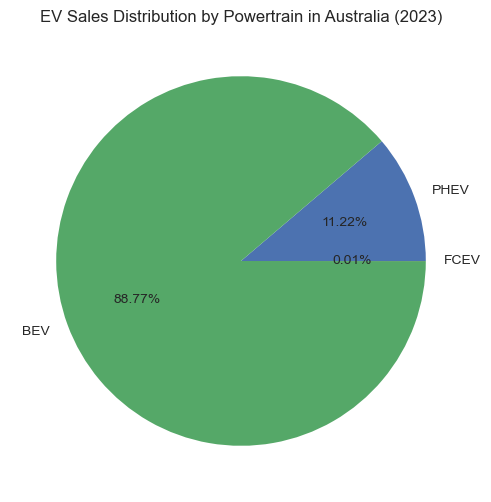

In [6]:
ev_sales_2023 = ev_sales[ev_sales['year'] == 2023]
plt.figure(figsize=(10, 6))
plt.pie(ev_sales_2023['value'], labels=ev_sales_2023['powertrain'], autopct='%1.2f%%')
plt.title('EV Sales Distribution by Powertrain in Australia (2023)')
plt.show()

# Conclusion and Insights

The Australian electric vehicle (EV) market has shown significant growth and transformation in recent years, with several noteworthy trends:

* Rapid BEV Adoption: Battery Electric Vehicles (BEVs) have experienced exponential growth, with sales increasing over 1.5 times from 2020 to 2023. This surge indicates a strong consumer shift towards fully electric options.
* Market Share Expansion: The EV sales share in Australia has grown remarkably, showing a twelve-fold increase since 2020. This substantial rise suggests a paradigm shift in consumer preferences towards sustainable transportation solutions.
* Diverse EV Landscape: While BEVs dominate the market with an 88.77% share of EV sales in 2023, Plug-in Hybrid Electric Vehicles (PHEVs) maintain a consistent growth trajectory, capturing 11.22% of the market. Fuel Cell Electric Vehicles (FCEVs), however, show a declining trend, indicating limited consumer interest or infrastructure support.
* Infrastructure Development: The charging infrastructure has evolved to support the growing EV fleet. A notable trend is the increase in fast charging points, coupled with a decrease in slow charging points since 2020. This shift suggests a strategic focus on enhancing charging efficiency and reducing charging times for EV users.
* Stock Accumulation: The consistent increase in EV stock, particularly BEVs, reflects both rising demand and improved product availability. This growth in the EV fleet is likely to drive further infrastructure development and market maturation.